In [1]:

import pandas as pd
import numpy as np

from astropy.table import Table
from astropy.io import ascii

import matplotlib.pyplot as plt
from extinction import add_colors_and_abs_mag

Configuration file not found:

    /home/mjablons/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


In [2]:
GAIA_EDR3_BIBCODE: str = '2020yCat.1350....0G'
WYIN_BIBCODE: str = '2008AJ....135.2264G'

In [58]:
not_found: pd.DataFrame = pd.read_csv('./data/ngc_188/not_found_pyupmask.csv')
gaia_sources: pd.DataFrame = pd.read_csv('./data/ngc_188/2_deg.csv')
pyupmask_clustered: pd.DataFrame = pd.read_csv('./data/ngc_188/pyupmask_clustered.csv')

In [4]:
list(gaia_sources.columns)

['solution_id',
 'designation',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pm',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'nu_eff_used_in_astrometry',
 'pseudocolour',
 'pseudocolour_error',
 'ra_pseudocolour_corr',
 'dec_pseudocolour_corr',
 'parallax_pseudocolour_corr',
 'pmra_pseudocolour_corr',
 'pmdec_pseudocolour_corr',
 'astrometric_matched_transits',
 'visibility_periods_used',
 'astrometric_sigma5d_max

In [5]:
not_found_dr3 = not_found.set_index('EDR3 id').join(
    gaia_sources.set_index('source_id')[['phot_g_mean_mag', 'phot_rp_mean_mag', 'phot_bp_mean_mag',
                                         'phot_g_mean_flux_over_error',
                                         'phot_rp_mean_flux_over_error',
                                         'phot_bp_mean_flux_over_error',
                                         'parallax_error']], rsuffix='dr3')

In [6]:
not_found_dr3.head()

,Unnamed: 0,obj_id,oid,link_bibcode,ra,dec,coo_bibcode,parallax,parallax_err,parallax_bibcode,...,DR2 id,TIC,reported,phot_g_mean_mag,phot_rp_mean_mag,phot_bp_mean_mag,phot_g_mean_flux_over_error,phot_rp_mean_flux_over_error,phot_bp_mean_flux_over_error,parallax_error
EDR3 id,,,,,,,,,,,,,,,,,,,,,
573941942962994176,3,NGC 188 1152,303904,2004PASP..116.1012S,11.164145,85.242850,2020yCat.1350....0G,0.6603,0.0853,2020yCat.1350....0G,...,5.739419e+17,461601256.0,3,17.893578,17.167656,18.497492,933.4488,108.658440,54.664450,0.085339
573942015979736064,9,Cl* NGC 188 MT 101,4924919,2004PASP..116.1012S,11.018051,85.257369,2020yCat.1350....0G,0.6422,0.0720,2020yCat.1350....0G,...,5.739420e+17,461601300.0,6,17.598103,16.878021,18.166887,1121.9954,122.088234,71.375340,0.072017
573956172191890176,23,Cl* NGC 188 PKM 3935,4924364,2004PASP..116.1012S,10.269637,85.372989,2020yCat.1350....0G,0.6464,0.0306,2020yCat.1350....0G,...,5.739562e+17,461599383.0,6,16.069790,15.516835,16.465230,2219.5970,430.958800,343.375550,0.030552
573941809821326848,29,Cl* NGC 188 MT 93,4924978,2004PASP..116.1012S,11.103153,85.227056,2020yCat.1350....0G,0.3893,0.0699,2020yCat.1350....0G,...,5.739418e+17,NaN,3,17.520086,16.836205,18.063732,1128.7244,236.867940,89.104805,0.069947
573940985187628800,65,NGC 188 2211,303928,2004PASP..116.1012S,11.502497,85.195300,2020yCat.1350....0G,0.3987,0.0557,2020yCat.1350....0G,...,5.739410e+17,461601145.0,6,17.128456,16.484653,17.620028,1413.3407,157.913280,110.553070,0.055655


In [7]:
not_found_dr3 = add_colors_and_abs_mag(not_found_dr3)

In [8]:
pyupmask_clustered = add_colors_and_abs_mag(pyupmask_clustered)

/home/mjablons/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2411: RuntimeWarning: invalid value encountered in color (vectorized)
  outputs = ufunc(*inputs)


# Missed sources on the HR diagram

In [9]:
len(pyupmask_clustered)

1358

In [10]:
len(not_found_dr3)

289

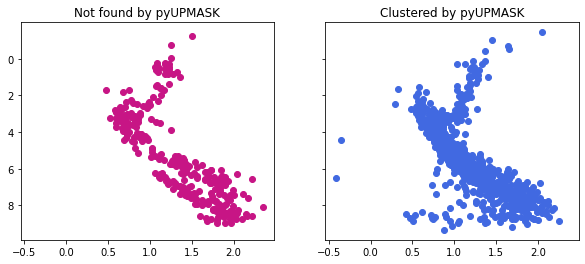

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
ax[0].scatter(not_found_dr3.color, not_found_dr3.mag_abs, color='mediumvioletred');
ax[0].invert_yaxis();
ax[0].set_title('Not found by pyUPMASK');
ax[1].scatter(pyupmask_clustered.color, pyupmask_clustered.mag_abs, color='royalblue');
ax[1].set_title('Clustered by pyUPMASK');

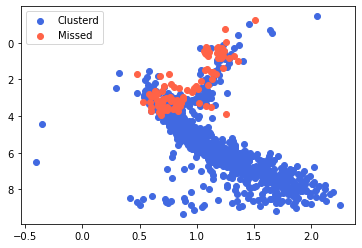

In [203]:
plt.scatter(pyupmask_clustered.color, pyupmask_clustered.mag_abs, color='royalblue', label='Clusterd');
plt.scatter(bright_sources.color, bright_sources.mag_abs, color='tomato', label='Missed');
plt.gca().invert_yaxis();
plt.legend();

In [157]:
bright_sources = not_found_dr3[not_found_dr3['mag_abs']<4]

# Missed sources: astrometry

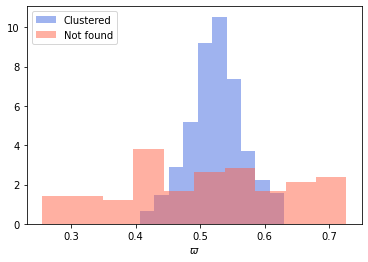

In [158]:
plt.hist(pyupmask_clustered.parallax, color='royalblue', alpha=.5, label='Clustered', density=True);
plt.hist(bright_sources.parallax, color='tomato', alpha=.5, label='Not found', density=True);
plt.legend(loc='upper left');
plt.gca().set_xlabel('$\\varpi$');

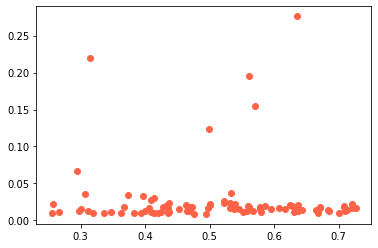

In [159]:
plt.scatter(bright_sources.parallax, bright_sources.parallax_err, color='tomato')

In [160]:
len(bright_sources)

89

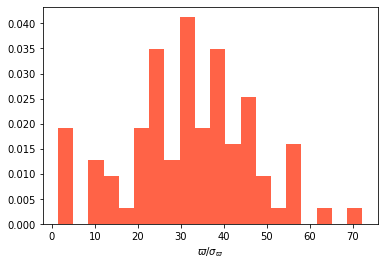

In [193]:
plt.hist(bright_sources['parallax']/bright_sources['parallax_err'], bins=20, color='tomato', density=True);
plt.gca().set_xlabel('$\\varpi/\sigma_\\varpi$');

In [162]:
gaia_sources.ra = gaia_sources.ra.apply(lambda x: x if x<50 else x-360)

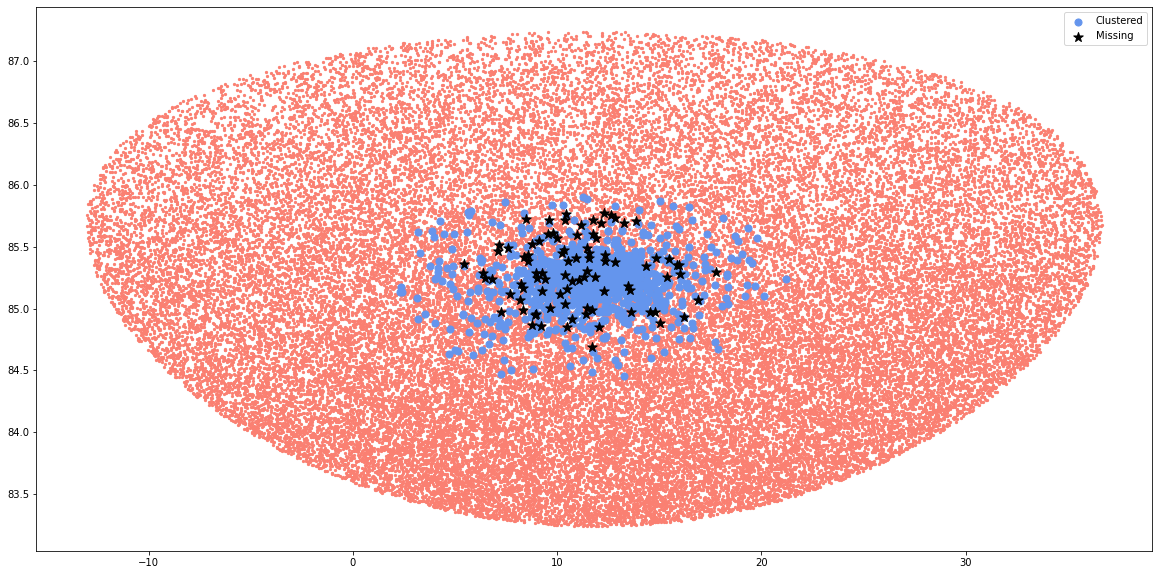

In [163]:
plt.figure(figsize=(20, 10))
plt.scatter(gaia_sources.ra, gaia_sources.dec, color='salmon', s=5.)
plt.scatter(pyupmask_clustered.ra, pyupmask_clustered.dec, color='cornflowerblue', s=50., label='Clustered')
plt.scatter(bright_sources.ra, bright_sources.dec, color='black', marker='*', s=100., label='Missing')
plt.legend()

In [165]:
bright_sources = bright_sources.join(gaia_sources.set_index('source_id')[
    ['ruwe', 'pmra', 'pmdec', 'pmra_error', 'pmdec_error']], rsuffix='dr3')

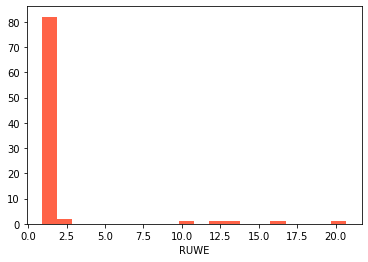

In [166]:
plt.hist(bright_sources.ruwe, bins=20, color='tomato');
plt.gca().set_xlabel('RUWE');

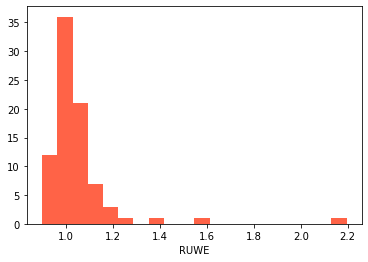

In [172]:
plt.hist(bright_sources[bright_sources.ruwe<2.5].ruwe, bins=20, color='tomato');
plt.gca().set_xlabel('RUWE');

In [167]:
def correct_flux_excess_factor(bp_rp, phot_bp_rp_excess_factor):
    """
    Calculate the corrected flux excess factor for the input Gaia EDR3 data.
    
    Parameters
    ----------
    
    bp_rp: float, numpy.ndarray
        The (BP-RP) colour listed in the Gaia EDR3 archive.
    phot_bp_rp_excess_factor: float, numpy.ndarray
        The flux excess factor listed in the Gaia EDR3 archive.
        
    Returns
    -------
    
    The corrected value for the flux excess factor, which is zero for "normal" stars.
    
    Example
    -------
    
    phot_bp_rp_excess_factor_corr = correct_flux_excess_factor(bp_rp, phot_bp_rp_flux_excess_factor)
    """
    
    if np.isscalar(bp_rp) or np.isscalar(phot_bp_rp_excess_factor):
        bp_rp = np.float64(bp_rp)
        phot_bp_rp_excess_factor = np.float64(phot_bp_rp_excess_factor)
    
    if bp_rp.shape != phot_bp_rp_excess_factor.shape:
        raise ValueError('Function parameters must be of the same shape!')
        
    do_not_correct = np.isnan(bp_rp)
    bluerange = np.logical_not(do_not_correct) & (bp_rp < 0.5)
    greenrange = np.logical_not(do_not_correct) & (bp_rp >= 0.5) & (bp_rp < 4.0)
    redrange = np.logical_not(do_not_correct) & (bp_rp > 4.0)
    
    correction = np.zeros_like(bp_rp)
    correction[bluerange] = 1.154360 + 0.033772*bp_rp[bluerange] + 0.032277*np.power(bp_rp[bluerange], 2)
    correction[greenrange] = 1.162004 + 0.011464*bp_rp[greenrange] + 0.049255*np.power(bp_rp[greenrange], 2) \
        - 0.005879*np.power(bp_rp[greenrange], 3)
    correction[redrange] = 1.057572 + 0.140537*bp_rp[redrange]
    
    return phot_bp_rp_excess_factor - correction

In [188]:
pyupmask_clustered = pyupmask_clustered.set_index('source_id').join(gaia_sources.set_index('source_id')['phot_g_mean_mag'])

In [178]:
pyupmask_clustered['correct_excess'] = correct_flux_excess_factor(pyupmask_clustered.bp_rp.values,
                                                                  pyupmask_clustered.phot_bp_rp_excess_factor.values)

In [179]:
bright_sources['correct_excess'] = correct_flux_excess_factor(bright_sources.bp_rp.values,
                                                              bright_sources.phot_bp_rp_excess_factor.values)

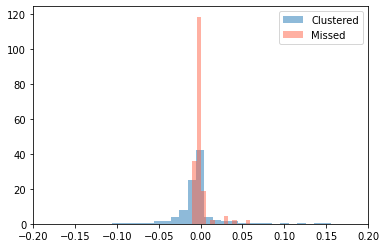

In [180]:
plt.hist(pyupmask_clustered.correct_excess, bins=100, alpha=.5, density=True, label='Clustered');
plt.hist(bright_sources.correct_excess, bins=100, color='tomato', alpha=.5, density=True, label='Missed');
plt.gca().set_xlim(-0.2, 0.2)
plt.legend();

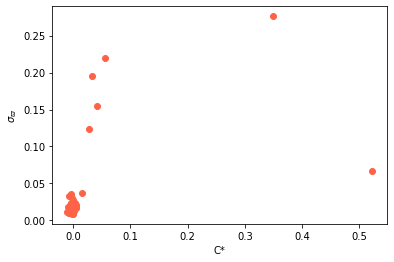

In [181]:
plt.scatter(bright_sources.correct_excess, bright_sources.parallax_err, color='tomato')
plt.gca().set_xlabel('C*')
plt.gca().set_ylabel('$\sigma_\\varpi$');

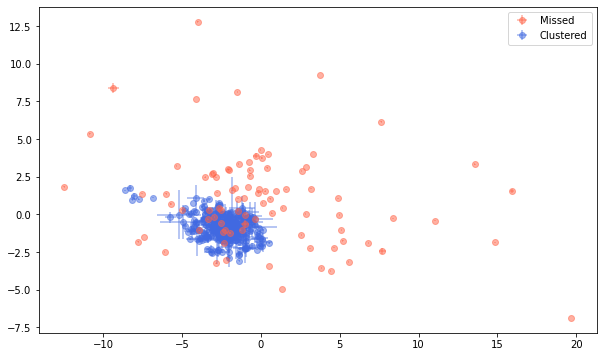

In [182]:
plt.figure(figsize=(10, 6));
plt.errorbar(bright_sources.pmradr3, bright_sources.pmdecdr3,
             xerr=bright_sources.pmra_error, yerr=bright_sources.pmdec_error, fmt='o',
             alpha=.5, color='tomato', label='Missed', zorder=2);
plt.errorbar(pyupmask_clustered.pmra, pyupmask_clustered.pmdec,
             xerr=pyupmask_clustered.pmra_error, yerr=pyupmask_clustered.pmdec_error,
             fmt='o', alpha=.5, color='royalblue', label='Clustered', zorder=1);
plt.legend();
plt.gca().set_xlabel('pmra');

Text(0, 0.5, 'Parallax over error')

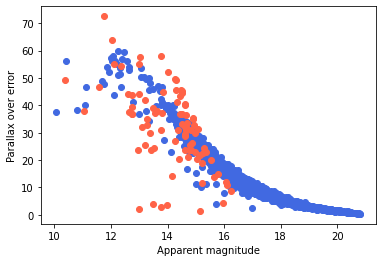

In [204]:
plt.scatter(pyupmask_clustered.phot_g_mean_mag, pyupmask_clustered.parallax_over_error, color='royalblue', label='Clustered')
plt.scatter(bright_sources.phot_g_mean_mag, bright_sources.parallax_over_error, color='tomato', label='Missed')
plt.gca().set_xlabel('Apparent magnitude')
plt.gca().set_ylabel('Parallax over error')

Text(0, 0.5, 'Parallax over error')

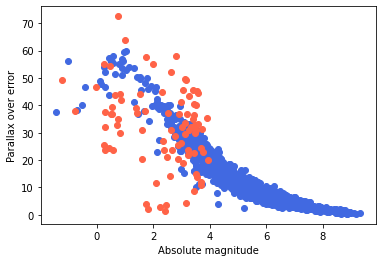

In [205]:
plt.scatter(pyupmask_clustered.mag_abs, pyupmask_clustered.parallax_over_error, color='royalblue')
plt.scatter(bright_sources.mag_abs, bright_sources.parallax_over_error, color='tomato')
plt.gca().set_xlabel('Absolute magnitude')
plt.gca().set_ylabel('Parallax over error')

Text(0.5, 0, 'Radial velocity')

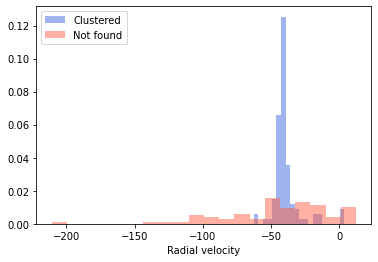

In [207]:
plt.hist(pyupmask_clustered.radial_velocity.dropna(),
         color='royalblue', alpha=.5, bins=20, label='Clustered', density=True);
plt.hist(bright_sources.radvel,
         color='tomato', alpha=.5, bins=20, label='Not found', density=True);
plt.legend(loc='upper left');
plt.gca().set_xlabel('Radial velocity')

In [220]:
MEDIAN_PMRA = np.median(pyupmask_clustered.pmra)
MEDIAN_PMDEC = np.median(pyupmask_clustered.pmdec)

STD_PMRA = np.std(pyupmask_clustered.pmra)
STD_PMDEC = np.std(pyupmask_clustered.pmdec)

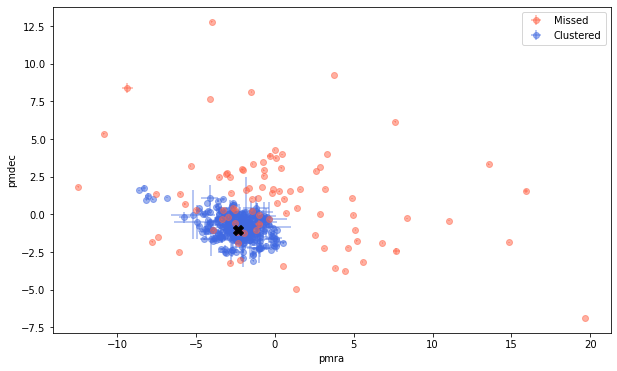

In [212]:
plt.figure(figsize=(10, 6));
plt.errorbar(bright_sources.pmradr3, bright_sources.pmdecdr3,
             xerr=bright_sources.pmra_error, yerr=bright_sources.pmdec_error, fmt='o',
             alpha=.5, color='tomato', label='Missed', zorder=2);
plt.errorbar(pyupmask_clustered.pmra, pyupmask_clustered.pmdec,
             xerr=pyupmask_clustered.pmra_error, yerr=pyupmask_clustered.pmdec_error,
             fmt='o', alpha=.5, color='royalblue', label='Clustered', zorder=1);
plt.scatter(MEDIAN_PMRA, MEDIAN_PMDEC, marker='X', s=100, zorder=3, color='black');
plt.legend();
plt.gca().set_xlabel('pmra');
plt.gca().set_ylabel('pmdec');

In [223]:
coherent_pmra_pmdec = bright_sources[(np.abs(bright_sources.pmradr3-MEDIAN_PMRA)<3*STD_PMRA) &
                                     (np.abs(bright_sources.pmdecdr3-MEDIAN_PMDEC)<3*STD_PMDEC)]
incoherent_pmra_pmdec = bright_sources[(np.abs(bright_sources.pmradr3-MEDIAN_PMRA)>3*STD_PMRA) &
                                     (np.abs(bright_sources.pmdecdr3-MEDIAN_PMDEC)>3*STD_PMDEC)]

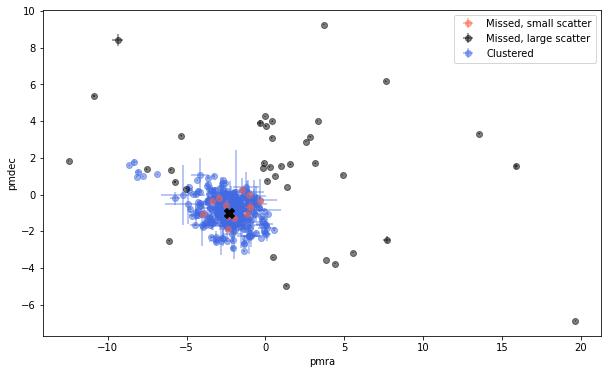

In [225]:
plt.figure(figsize=(10, 6));
plt.errorbar(coherent_pmra_pmdec.pmradr3, coherent_pmra_pmdec.pmdecdr3,
             xerr=coherent_pmra_pmdec.pmra_error, yerr=coherent_pmra_pmdec.pmdec_error, fmt='o',
             alpha=.5, color='tomato', label='Missed, small scatter', zorder=2);
plt.errorbar(incoherent_pmra_pmdec.pmradr3, incoherent_pmra_pmdec.pmdecdr3,
             xerr=incoherent_pmra_pmdec.pmra_error, yerr=incoherent_pmra_pmdec.pmdec_error, fmt='o',
             alpha=.5, color='black', label='Missed, large scatter', zorder=2);
plt.errorbar(pyupmask_clustered.pmra, pyupmask_clustered.pmdec,
             xerr=pyupmask_clustered.pmra_error, yerr=pyupmask_clustered.pmdec_error,
             fmt='o', alpha=.5, color='royalblue', label='Clustered', zorder=1);
plt.scatter(MEDIAN_PMRA, MEDIAN_PMDEC, marker='X', s=100, zorder=3, color='black');
plt.legend();
plt.gca().set_xlabel('pmra');
plt.gca().set_ylabel('pmdec');

In [228]:
coherent_pmra_pmdec.ruwe

EDR3 id
573943252930299392     1.148241
573964624687540608     1.033707
573941603662878208     0.921948
573979055777797888     0.990275
573968198100312704    12.960780
573984690774681472     1.083513
573573817024717696     0.967596
573949678201393792     1.065527
573543168137999744     0.965217
574069726831240960     0.996808
573774271736456832     0.992812
573941466222298240     2.195361
573551822494228096     1.028990
Name: ruwe, dtype: float64

In [232]:
good_ruwe = coherent_pmra_pmdec[coherent_pmra_pmdec.ruwe<=1.4]

In [233]:
good_ruwe.correct_excess

EDR3 id
573943252930299392   -0.006870
573964624687540608   -0.001611
573941603662878208   -0.003858
573979055777797888    0.000498
573984690774681472   -0.002078
573573817024717696   -0.002251
573949678201393792   -0.005133
573543168137999744   -0.005252
574069726831240960   -0.002439
573774271736456832   -0.006976
573551822494228096    0.002471
Name: correct_excess, dtype: float64

In [234]:
good_ruwe.parallax

EDR3 id
573943252930299392    0.6671
573964624687540608    0.3664
573941603662878208    0.7095
573979055777797888    0.4090
573984690774681472    0.5215
573573817024717696    0.2550
573949678201393792    0.4352
573543168137999744    0.3470
574069726831240960    0.3932
573774271736456832    0.2669
573551822494228096    0.4362
Name: parallax, dtype: float64

In [235]:
good_ruwe.parallax_over_error

EDR3 id
573943252930299392    63.972004
573964624687540608    21.070885
573941603662878208    57.873657
573979055777797888    15.087319
573984690774681472    22.816866
573573817024717696    25.497152
573949678201393792    44.055088
573543168137999744    29.944046
574069726831240960    41.930420
573774271736456832    24.479443
573551822494228096    18.910814
Name: parallax_over_error, dtype: float64

Text(0.5, 0, '$\\varpi$')

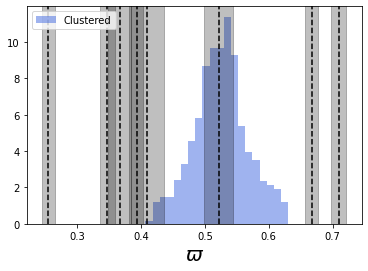

In [268]:
plt.hist(pyupmask_clustered.parallax,
         color='royalblue', alpha=.5, bins=20, label='Clustered', density=True);
for _, r in radvel.iterrows():
    plt.axvline(r.parallax, 0., 12, linestyle='--', color='black')
    plt.axvspan(r.parallax-r.parallax_err, r.parallax+r.parallax_error, 0., 12., alpha=.25, color='black')
# plt.hist(radvel.parallax,
#          color='tomato', alpha=.5, bins=20, label='Not found', density=True);
plt.legend(loc='upper left');
plt.gca().set_xlabel('$\\varpi$', fontsize=20)

In [236]:
good_ruwe.radvel

EDR3 id
573943252930299392   -37.96
573964624687540608   -42.22
573941603662878208   -26.05
573979055777797888   -43.42
573984690774681472   -32.35
573573817024717696   -44.00
573949678201393792   -61.00
573543168137999744   -46.40
574069726831240960   -27.20
573774271736456832   -80.20
573551822494228096      NaN
Name: radvel, dtype: float64

In [238]:
good_ruwe.radvel_err

EDR3 id
573943252930299392    2.38
573964624687540608     NaN
573941603662878208     NaN
573979055777797888     NaN
573984690774681472     NaN
573573817024717696    0.10
573949678201393792    0.10
573543168137999744    0.20
574069726831240960    0.50
573774271736456832    0.10
573551822494228096     NaN
Name: radvel_err, dtype: float64

Text(0.5, 0, 'Radial velocity')

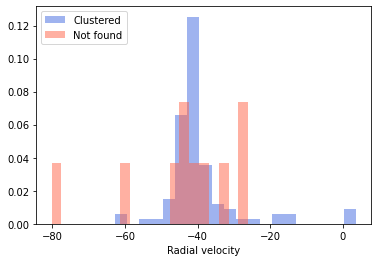

In [237]:
plt.hist(pyupmask_clustered.radial_velocity.dropna(),
         color='royalblue', alpha=.5, bins=20, label='Clustered', density=True);
# plt.hist(good_ruwe.radvel,
#          color='tomato', alpha=.5, bins=20, label='Not found', density=True);
plt.legend(loc='upper left');
plt.gca().set_xlabel('Radial velocity')

In [244]:
radvel = good_ruwe[(good_ruwe.radvel<=-20) & (good_ruwe.radvel>=-60)]

Text(0.5, 0, 'Radial velocity')

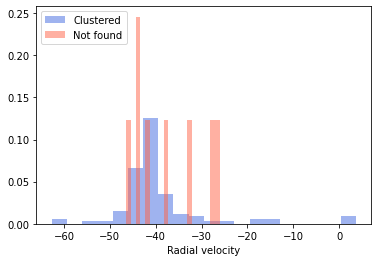

In [245]:
plt.hist(pyupmask_clustered.radial_velocity.dropna(),
         color='royalblue', alpha=.5, bins=20, label='Clustered', density=True);
plt.hist(radvel.radvel,
         color='tomato', alpha=.5, bins=20, label='Not found', density=True);
plt.legend(loc='upper left');
plt.gca().set_xlabel('Radial velocity')

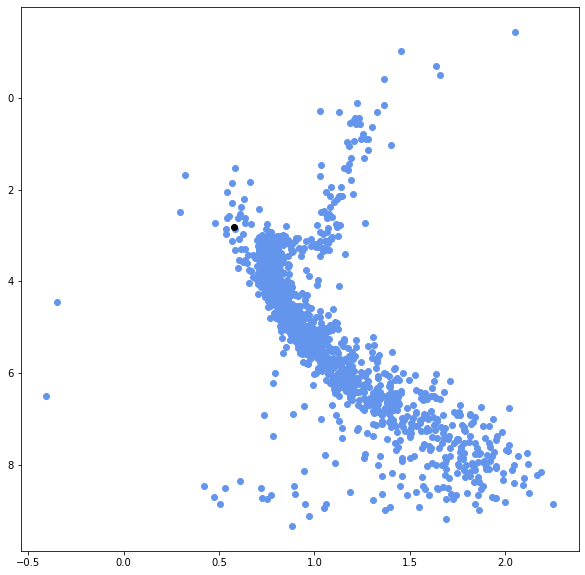

In [272]:
plt.figure(figsize=(10, 10))
plt.scatter(pyupmask_clustered.color, pyupmask_clustered.mag_abs, color='cornflowerblue', label='Clustered');
plt.errorbar(radvel[radvel.oid==303045].color, radvel[radvel.oid==303045].mag_abs,  color='black', fmt='o');
plt.gca().invert_yaxis();

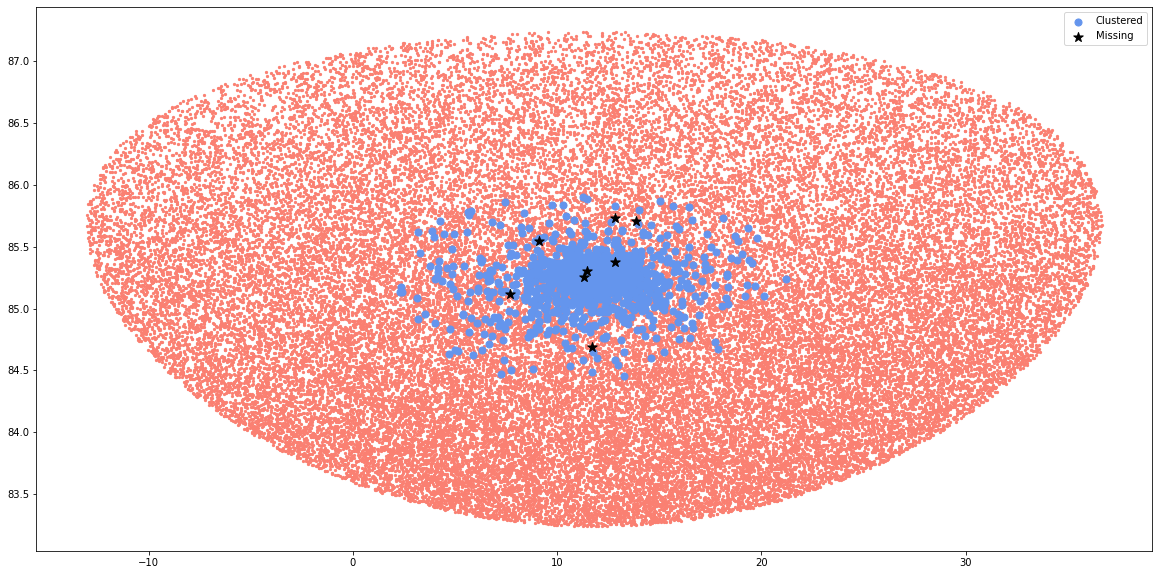

In [258]:
plt.figure(figsize=(20, 10))
plt.scatter(gaia_sources.ra, gaia_sources.dec, color='salmon', s=5.)
plt.scatter(pyupmask_clustered.ra, pyupmask_clustered.dec, color='cornflowerblue', s=50., label='Clustered')
plt.scatter(radvel.ra, radvel.dec, color='black', marker='*', s=100., label='Missing')
plt.legend()

In [270]:
radvel.sort_values(by='color').head()

,Unnamed: 0,obj_id,oid,link_bibcode,ra,dec,coo_bibcode,parallax,parallax_err,parallax_bibcode,...,ruwe,pmradr3,pmdecdr3,pmra_error,pmdec_error,bp_rp,phot_bp_rp_excess_factor,correct_excess,parallax_over_error,phot_g_mean_mag
EDR3 id,,,,,,,,,,,,,,,,,,,,,
573941603662878208,697,NGC 188 1050,303045,2003AJ....126.2922P,11.330262,85.258097,2020yCat.1350....0G,0.7095,0.0123,2020yCat.1350....0G,...,0.921948,-2.347058,-1.872457,0.015270,0.014265,0.692625,1.187762,-0.003858,57.873657,13.769313
573984690774681472,905,Cl* NGC 188 DGV 1872,303575,2008AJ....135.2264G,9.108784,85.545032,2020yCat.1350....0G,0.5215,0.0229,2020yCat.1350....0G,...,1.083513,-1.488168,0.228788,0.025704,0.030744,0.763895,1.194805,-0.002078,22.816866,15.372888
573979055777797888,794,Cl* NGC 188 PKM 1366,4926224,2008AJ....135.2264G,12.813461,85.733946,2020yCat.1350....0G,0.4090,0.0271,2020yCat.1350....0G,...,0.990275,-3.384348,-0.339872,0.029856,0.031250,0.866235,1.205570,0.000498,15.087319,15.771323
573964624687540608,666,Cl* NGC 188 DGV 1406,303206,2004PASP..116.1012S,12.837011,85.378193,2020yCat.1350....0G,0.3664,0.0174,2020yCat.1350....0G,...,1.033707,-2.262969,-1.039555,0.022579,0.020511,0.889615,1.205434,-0.001611,21.070885,14.736307
574069726831240960,1081,2MASS J00552582+8542389,3741189,2018AJ....156..142D,13.857587,85.710799,2020yCat.1350....0G,0.3932,0.0094,2020yCat.1350....0G,...,0.996808,-1.038604,-0.017117,0.011032,0.011047,1.352746,1.250652,-0.002439,41.930420,13.185139


In [273]:
radvel[['link_bibcode', 'reported']]

,link_bibcode,reported
EDR3 id,,
573943252930299392,2020A&A...640A...1C,8
573964624687540608,2004PASP..116.1012S,3
573941603662878208,2003AJ....126.2922P,1
573979055777797888,2008AJ....135.2264G,1
573984690774681472,2008AJ....135.2264G,2
573573817024717696,2011AJ....142...59J,2
573543168137999744,2018AJ....156..142D,1
574069726831240960,2018AJ....156..142D,1


In [274]:
radvel[radvel.link_bibcode=='2018AJ....156..142D']

,Unnamed: 0,obj_id,oid,link_bibcode,ra,dec,coo_bibcode,parallax,parallax_err,parallax_bibcode,...,ruwe,pmradr3,pmdecdr3,pmra_error,pmdec_error,bp_rp,phot_bp_rp_excess_factor,correct_excess,parallax_over_error,phot_g_mean_mag
EDR3 id,,,,,,,,,,,,,,,,,,,,,
573543168137999744,1057,2MASS J00465109+8441110,11863741,2018AJ....156..142D,11.712948,84.686369,2020yCat.1350....0G,0.3470,0.0116,2020yCat.1350....0G,...,0.965217,-2.524513,-0.545465,0.011649,0.012845,1.364607,1.249177,-0.005252,29.944046,13.394074
574069726831240960,1081,2MASS J00552582+8542389,3741189,2018AJ....156..142D,13.857587,85.710799,2020yCat.1350....0G,0.3932,0.0094,2020yCat.1350....0G,...,0.996808,-1.038604,-0.017117,0.011032,0.011047,1.352746,1.250652,-0.002439,41.930420,13.185139


In [275]:
radvel[radvel.link_bibcode=='2020A&A...640A...1C']

,Unnamed: 0,obj_id,oid,link_bibcode,ra,dec,coo_bibcode,parallax,parallax_err,parallax_bibcode,...,ruwe,pmradr3,pmdecdr3,pmra_error,pmdec_error,bp_rp,phot_bp_rp_excess_factor,correct_excess,parallax_over_error,phot_g_mean_mag
EDR3 id,,,,,,,,,,,,,,,,,,,,,
573943252930299392,564,NGC 188 2072,303184,2020A&A...640A...1C,11.463221,85.302321,2020yCat.1350....0G,0.6671,0.0104,2020yCat.1350....0G,...,1.148241,-2.392749,-1.191267,0.013041,0.012085,1.447544,1.257105,-0.00687,63.972004,12.050139
